<hr style="height:10px"> 
 
<div class='container2'>
		<div>
			<img src='images\header.png' ALIGN='left' style='width:10em'>
		</div>	
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2025/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial - Análise Exploratória de Dados </b></div>
	</div>
	
</div>


 <hr style="height:5px"> 

    
<h2>Entraga 2 - Introdução à Ciência de Dados - <a href="https://www.kaggle.com/datasets/atharvasoundankar/global-tech-gadget-consumption-data-2015-2025">🌍 Global Tech Gadget Consumption Data (2015-2025) </a> </h2>

Notebook desenvolvido por: <a href="https://github.com/pedrokall">Pedro Richardt Kall</a>

 <hr style="height:2px"> 

In [2]:
# -*- coding: utf-8 -*-

# importar a biblioteca usada para trabalhar com vetores e matrizes
import numpy as np

# importar a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados
import pandas as pd 

# importar as bibliotecas usadas para geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


---
## 1. Bibliotecas Necessárias para o Notebook

Para este notebook, deve ser utilizada a mesma versão apresentada pelo professor da disciplina.

* [`matplotlib`](https://matplotlib.org/) (versão 3.1.3 ou superior): construção e exibição de gráficos variados.
* [`seaborn`](https://seaborn.pydata.org/) (versão 0.10.0 ou superior): construção e exibição de gráficos variados.
* [`numpy`](https://numpy.org) (versão 1.16.2 ou superior): manipulação de dados em formato de vetores e matrizes.
* [`pandas`](https://pandas.pydata.org/pandas-docs/stable/index.html) (versão 0.24.1 ou superior): manipulação de dados em formato de tabelas.

Será utilizado o conjunto de dados que se encontra no diretório `datasets`, em formato de arquivo `.csv e/ou .txt`.

Primeiro: vamos importar os dados para o dataframe.

In [3]:
# importar o arquivo e guardar em um dataframe do Pandas
df_dataset = pd.read_csv ( 'datasets/Global_Tech_Gadget_Consumption.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [4]:
display(df_dataset)

,Country,Year,smartphone_sales_(Millions),laptop_shipments_(Millions),gaming_console_adoption_(%),smartwatch_penetration_(%),average_consumer_spending_on_gadgets_($),e-waste_generated_(metric_tons),5G_penetration_rate_(%)
0,USA,2015,111.37,123.63,12.05,14.49,311.21,939.89,54.64
1,USA,2016,224.65,65.27,12.92,9.88,250.46,1361.42,53.61
2,USA,2017,102.12,26.75,19.63,17.35,2404.22,872.52,29.94
3,USA,2018,148.10,129.28,26.44,12.45,1883.37,1241.41,75.88
4,USA,2019,83.93,97.81,20.84,6.18,777.42,1939.39,76.26
...,...,...,...,...,...,...,...,...,...
105,Canada,2021,458.94,25.18,36.58,12.61,2765.28,1954.06,32.34
106,Canada,2022,124.51,132.45,25.12,5.59,2740.43,251.69,73.44
107,Canada,2023,82.40,90.87,37.58,22.00,1770.03,1368.87,53.54
108,Canada,2024,382.35,135.66,39.39,23.25,2061.97,1783.59,5.91


---
## 3. Pré-processamento

Minimizar ou eliminar problemas existentes em um conjunto de dados, bem como torná-los mais adequados para sua utilização por um determinado algoritmo de aprendizagem de máquina.

## 3.1 Eliminação de atributos irrelevantes

O objetivo do projeto é identificar o país com maior geração de resíduo, que é a (`classe`). Não é preciso uma análise profunda para observar que os atributos `smartwatch_penetration_(%)`, `gaming_console_adoption_(%)`, `5G_penetration_rate_(%)` não contribuem para a identificação. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes. 

*Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.*

In [5]:
df_dataset = df_dataset.drop(columns=['smartwatch_penetration_(%)','gaming_console_adoption_(%)', '5G_penetration_rate_(%)'])

display(df_dataset.head(n=10))

,Country,Year,smartphone_sales_(Millions),laptop_shipments_(Millions),average_consumer_spending_on_gadgets_($),e-waste_generated_(metric_tons)
0,USA,2015,111.37,123.63,311.21,939.89
1,USA,2016,224.65,65.27,250.46,1361.42
2,USA,2017,102.12,26.75,2404.22,872.52
3,USA,2018,148.10,129.28,1883.37,1241.41
4,USA,2019,83.93,97.81,777.42,1939.39
5,USA,2020,300.49,100.59,593.73,136.97
6,USA,2021,328.38,64.96,1804.60,183.51
7,USA,2022,239.21,63.46,339.59,175.00
8,USA,2023,104.51,40.42,1602.85,1482.32
9,USA,2024,444.57,58.60,1107.74,1902.16


---
## 3.2 Tratamento de atributos com valores ausentes

Verificar se existem atributos com valores ausentes (NaN) na base de dados.

In [6]:
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valores ausentes
display(df_dataset.iloc[idxRowNan])

,Country,Year,smartphone_sales_(Millions),laptop_shipments_(Millions),average_consumer_spending_on_gadgets_($),e-waste_generated_(metric_tons)


---
## 3.3 Tratamento de dados inconsistentes ou redundantes

Verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há registros representados por atributos com todos os valores iguais, mas com diagnóstico diferentes. A redundância é dada pela repetição de linhas na base de dados.

In [8]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['Country','Year','smartphone_sales_(Millions)','e-waste_generated_(metric_tons)'],keep=False)] 

# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates) > 0:
    print('\nObjeto(s) redundante(s) e/ou inconsistente(s):')
    display(df_duplicates)
else:
    print('Não existem objetos redundantes e/ou inconsistentes!')

Não existem objetos redundantes e/ou inconsistentes!


Não existem objetos redundantes (duplicados) ou outros inconsistentes (iguais, exceto diagnóstico distintos). 

Logo, não há necessidade de remover os registros redundantes, mantendo na base apenas o primeiro deles.

---
## 4. Análise dos Dados
A análise das características presentes em um conjunto de dados permite a descoberta de padrões e tendências que podem fornecer informações valiosas para compreender o processo que gerou os dados.

In [9]:
df_detalhes = df_dataset.describe()

display(df_detalhes)

,Year,smartphone_sales_(Millions),laptop_shipments_(Millions),average_consumer_spending_on_gadgets_($),e-waste_generated_(metric_tons)
count,110.00000,110.000000,110.000000,110.000000,110.000000
mean,2020.00000,269.095545,86.082000,1571.539182,1035.352636
std,3.17675,128.313552,36.429392,816.552255,562.591157
min,2015.00000,64.000000,20.790000,220.090000,111.470000
25%,2017.00000,156.910000,59.412500,856.957500,570.250000
50%,2020.00000,253.435000,87.450000,1592.145000,1023.270000
75%,2023.00000,376.255000,113.965000,2195.960000,1487.847500
max,2025.00000,499.890000,149.210000,2989.540000,1962.590000


---
## 4.1 Detecção de outliers (valor atípico)
Outro passo importante na análise e tratamento dos dados é a detecção de outliers (dados gerados por leituras incorretas, erros de digitação etc).

`Gráfico Box Plot`

Uma das maneiras mais simples de verificar se os dados contém outliers.

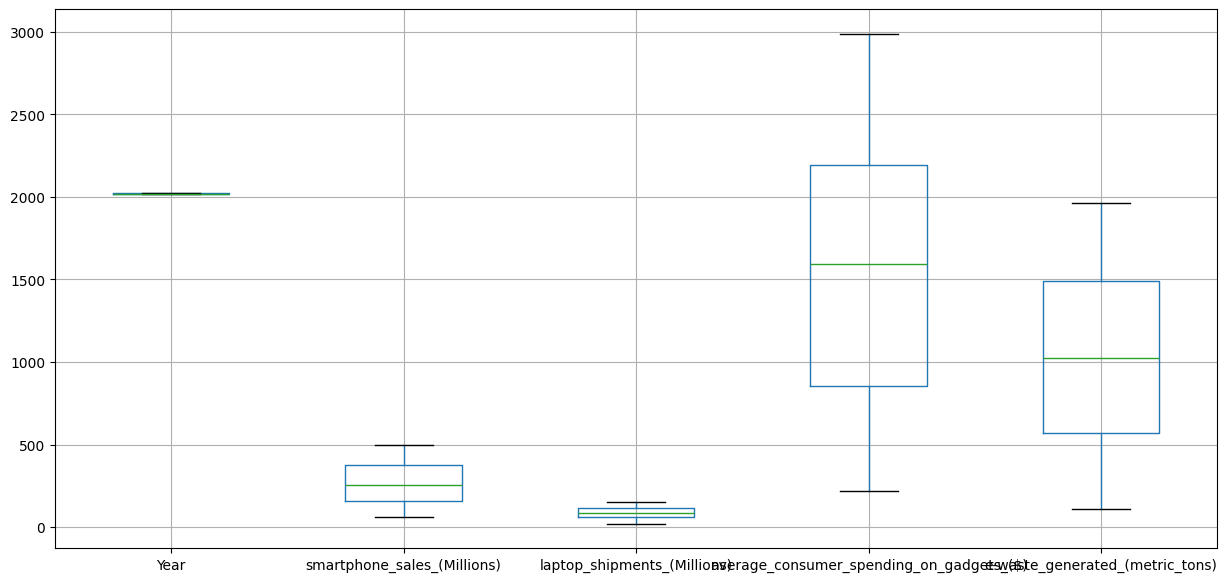

In [10]:
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando que nenhuma das colunas numéricas do dataset possui outliers segundo a regra do IQR. Isso significa que todos os valores estão dentro do intervalo considerado normal, sem pontos extremos além dos limites definidos.